
This dataset contains weather-related information (Outlook, Temperature, Humidity, Wind) and a binary target variable (Play) indicating whether tennis can be played (yes) or not (no) on a given day. It comprises varying weather conditions, and the goal is to predict tennis suitability based on weather factors.

In [ ]:
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tennis_data.csv to tennis_data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['tennis_data.csv']))

In [ ]:
df

,Day,Outlook,Temp,Humidity,Wind,Play
0,1,rainy,cool,normal,weak,no
1,2,overcast,mild,normal,weak,no
2,3,rainy,cool,high,strong,yes
3,4,rainy,mild,high,weak,no
4,5,rainy,cool,high,strong,yes
...,...,...,...,...,...,...
995,996,overcast,mild,normal,weak,yes
996,997,sunny,cool,high,strong,no
997,998,sunny,cool,normal,strong,no
998,999,overcast,cool,normal,weak,yes


In [ ]:
# Split the dataset into subsets
X = df.drop('Play', axis=1)
y = df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# Split the dataset into subsets
X = df.drop('Play', axis=1)
y = df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y = df['Play']
X = df.drop(['Play'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

df['Outlook'] = Le.fit_transform(df['Outlook'])
df['Temp'] = Le.fit_transform(df['Temp'])
df['Humidity'] = Le.fit_transform(df['Humidity'])
df['Wind'] = Le.fit_transform(df['Wind'])
df['Play'] = Le.fit_transform(df['Play'])

In [ ]:
# Split the dataset into subsets
X = df.drop('Play', axis=1)
y = df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y = df['Play']
X = df.drop(['Play'],axis=1)

In [ ]:
# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'gini')
clf = clf.fit(X, y)

[Text(0.631938328843763, 0.9814814814814815, 'x[1] <= 1.5\ngini = 0.5\nsamples = 1000\nvalue = [499, 501]'),
 Text(0.49086976792374637, 0.9444444444444444, 'x[0] <= 786.5\ngini = 0.499\nsamples = 668\nvalue = [349, 319]'),
 Text(0.33980004144218817, 0.9074074074074074, 'x[0] <= 592.5\ngini = 0.495\nsamples = 519\nvalue = [286, 233]'),
 Text(0.14903646912556984, 0.8703703703703703, 'x[0] <= 170.5\ngini = 0.499\nsamples = 387\nvalue = [200, 187]'),
 Text(0.11489846663903854, 0.8333333333333334, 'x[0] <= 137.5\ngini = 0.468\nsamples = 107\nvalue = [67, 40]'),
 Text(0.09718193120596767, 0.7962962962962963, 'x[0] <= 108.5\ngini = 0.495\nsamples = 87\nvalue = [48, 39]'),
 Text(0.07169498549523415, 0.7592592592592593, 'x[0] <= 64.5\ngini = 0.473\nsamples = 73\nvalue = [45, 28]'),
 Text(0.048901782014090345, 0.7222222222222222, 'x[0] <= 38.5\ngini = 0.498\nsamples = 45\nvalue = [24, 21]'),
 Text(0.02818068794032325, 0.6851851851851852, 'x[0] <= 30.5\ngini = 0.466\nsamples = 27\nvalue = [17, 10

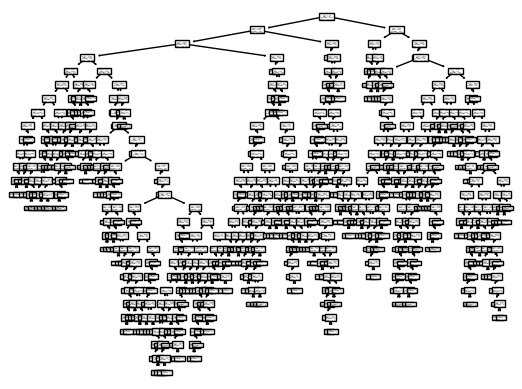

In [ ]:
# We can visualize the tree using tree.plot_tree
tree.plot_tree(clf)

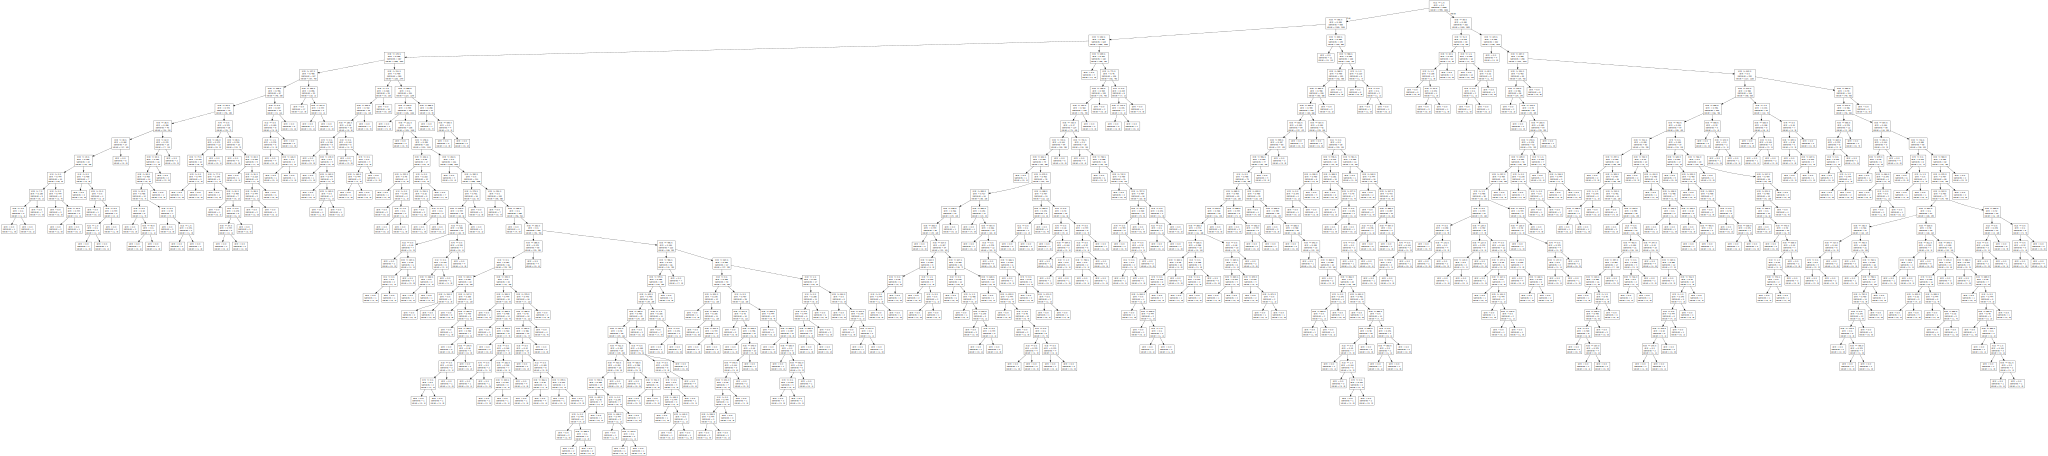

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# The predictions are stored in X_pred
X_pred = clf.predict(X)

In [ ]:
# verifying if the model has predicted it all right.
X_pred == y

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: Play, Length: 1000, dtype: bool

In [ ]:
# Decision Tree with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)

INFORMATION GAIN

In [ ]:
dt_info_gain = DecisionTreeClassifier(criterion='gini')
dt_info_gain.fit(X_train, y_train)
y_pred_info_gain = dt_info_gain.predict(X_test)


MISCLASSIFICATION ERROR

In [ ]:
# Decision Tree with Misclassification Error
dt_misclassification = DecisionTreeClassifier(criterion='gini', splitter='random')
dt_misclassification.fit(X_train, y_train)
y_pred_misclassification = dt_misclassification.predict(X_test)

Descision Tree Classifier


In [ ]:
dt_gini = DecisionTreeClassifier(criterion="gini")
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

Predicting the Test set results with criterion gini index

In [ ]:
y_pred_gini = dt_gini.predict(X_test)

ACCURACY

In [ ]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Accuracy with criterion entropy:", accuracy_entropy)

Accuracy with criterion entropy: 0.505


Train-set and test-set accuracy

In [ ]:
train_accuracy_gini = accuracy_score(y_train, dt_gini.predict(X_train))
test_accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Train set accuracy with criterion entropy:", train_accuracy_gini)
print("Test set accuracy with criterion entropy:", test_accuracy_gini)

Train set accuracy with criterion entropy: 1.0
Test set accuracy with criterion entropy: 0.485


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with inbuilt library:", accuracy)

Accuracy with inbuilt library: 0.485


In [ ]:
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_infogain = DecisionTreeClassifier(criterion="entropy")
clf_misclass = DecisionTreeClassifier(criterion="entropy")

In [ ]:
clf_gini.fit(X_train, y_train)
clf_infogain.fit(X_train, y_train)
clf_misclass.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_infogain = clf_infogain.predict(X_test)
y_pred_misclass = clf_misclass.predict(X_test)

In [ ]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_infogain = accuracy_score(y_test, y_pred_infogain)
accuracy_misclass = accuracy_score(y_test, y_pred_misclass)


In [ ]:
print("Accuracy with Gini impurity:", accuracy_gini)
print("Accuracy with Information Gain:", accuracy_infogain)
print("Accuracy with Misclassification Error:", accuracy_misclass)

Accuracy with Gini impurity: 0.505
Accuracy with Information Gain: 0.49
Accuracy with Misclassification Error: 0.48


ENTROPY


In [ ]:
# Fitting the model for ENTROPY
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(criterion = 'entropy')
clf1 = clf1.fit(X, y)

[Text(0.6125602180527383, 0.9852941176470589, 'x[1] <= 1.5\nentropy = 1.0\nsamples = 1000\nvalue = [499, 501]'),
 Text(0.4570708671399594, 0.9558823529411765, 'x[0] <= 786.5\nentropy = 0.999\nsamples = 668\nvalue = [349, 319]'),
 Text(0.3137360547667343, 0.9264705882352942, 'x[0] <= 592.5\nentropy = 0.992\nsamples = 519\nvalue = [286, 233]'),
 Text(0.13964249492900607, 0.8970588235294118, 'x[0] <= 170.5\nentropy = 0.999\nsamples = 387\nvalue = [200, 187]'),
 Text(0.0973630831643002, 0.8676470588235294, 'x[0] <= 137.5\nentropy = 0.954\nsamples = 107\nvalue = [67, 40]'),
 Text(0.07707910750507099, 0.8382352941176471, 'x[0] <= 108.5\nentropy = 0.992\nsamples = 87\nvalue = [48, 39]'),
 Text(0.0486815415821501, 0.8088235294117647, 'x[0] <= 64.5\nentropy = 0.961\nsamples = 73\nvalue = [45, 28]'),
 Text(0.02434077079107505, 0.7794117647058824, 'x[0] <= 62.0\nentropy = 0.997\nsamples = 45\nvalue = [24, 21]'),
 Text(0.02028397565922921, 0.75, 'x[0] <= 2.5\nentropy = 0.99\nsamples = 43\nvalue = 

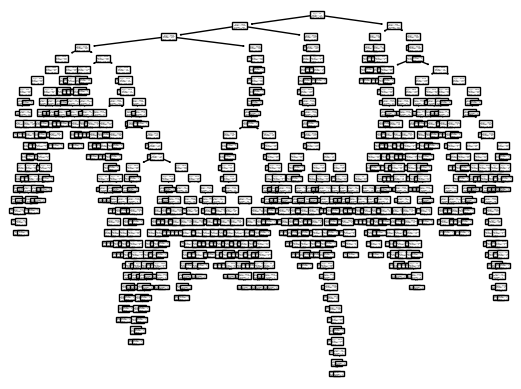

In [ ]:
tree.plot_tree(clf1)

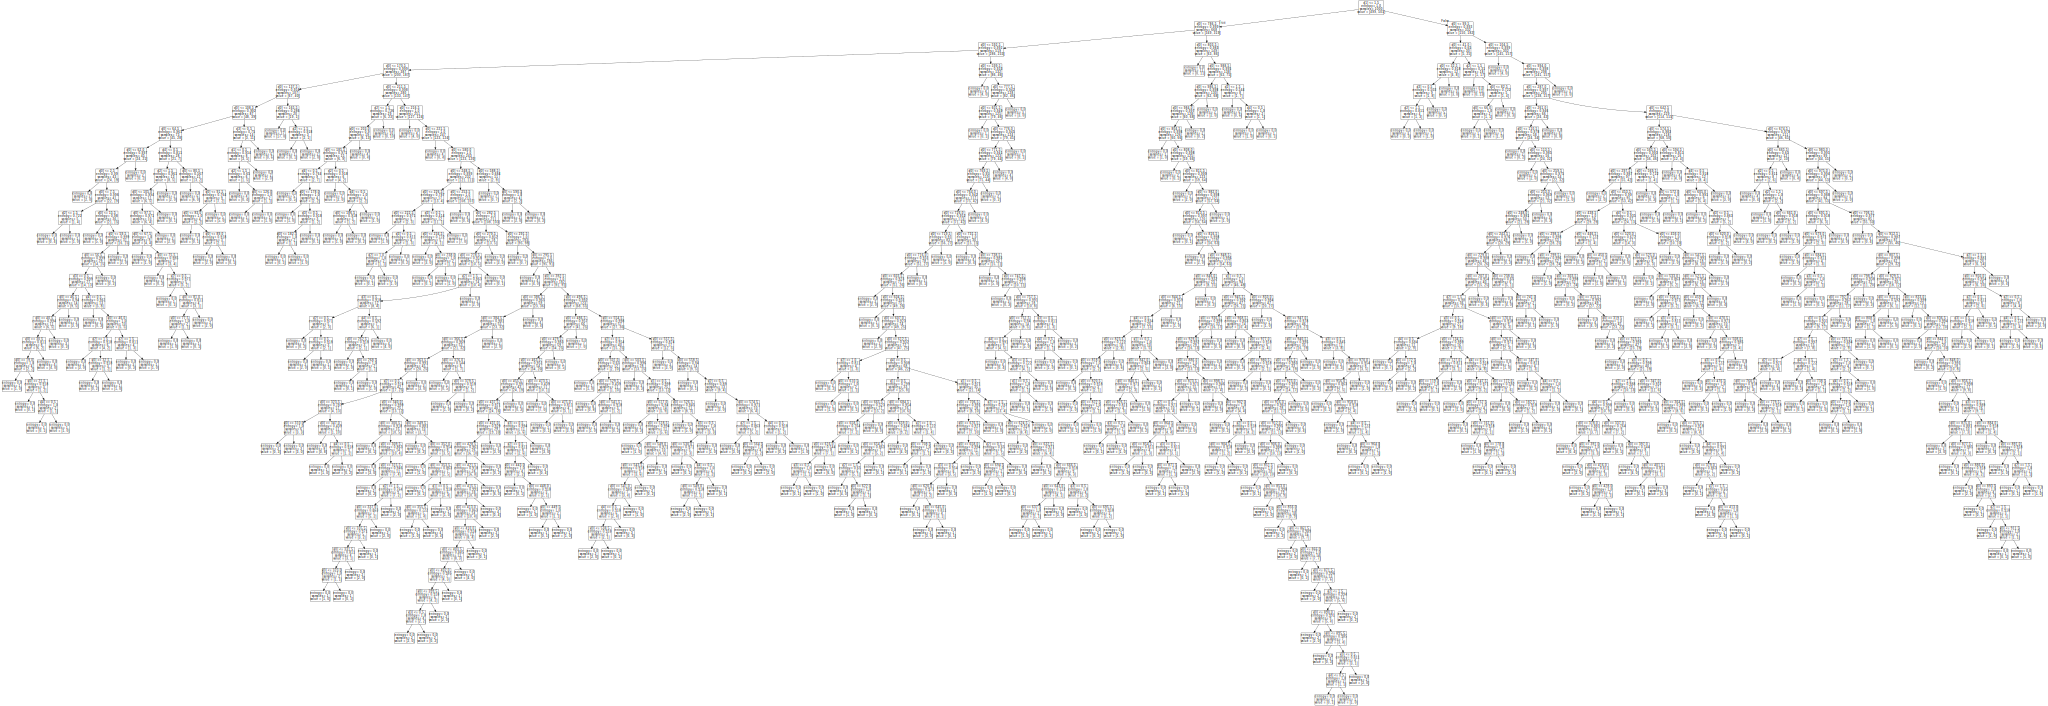

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf1, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
X = df.drop('tourney_id', axis=1)
y = df['tourney_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.25, random_state=1)

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
train_df.describe
test_df.describe


<bound method NDFrame.describe of      Day   Outlook  Temp Humidity    Wind Play
507  508     rainy  cool     high  strong  yes
818  819  overcast  mild   normal  strong   no
452  453     sunny   hot   normal  strong  yes
368  369     sunny  mild   normal    weak   no
242  243     sunny  cool     high    weak   no
..   ...       ...   ...      ...     ...  ...
385  386     rainy  mild     high  strong   no
890  891     rainy  cool   normal  strong  yes
439  440  overcast   hot   normal    weak   no
135  136  overcast   hot     high  strong  yes
567  568     sunny  mild     high    weak  yes

[250 rows x 6 columns]>

In [ ]:
clf = DecisionTreeClassifier(criterion="gini")

In [ ]:
X = df_new.iloc[:,:-1]
X
Y = df_new.iloc[:,-1]
Y

0       1877.07.09
1       1878.07.08
2       1879.07.07
3       1880.07.05
4       1881.07.02
           ...    
4109    2017.10.16
4110    2017.10.23
4111    2017.10.23
4112    2017.10.30
4113    2017.11.12
Name: tourney_dates, Length: 4114, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)
X_train
y_train
clf = DecisionTreeClassifier(criterion="gini")

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

          Actual   Predicted
149   1936.01.20  1905.11.21
166   1940.09.02  1881.08.31
2855  1999.04.26  1974.05.15
811   1975.12.21  1971.01.18
3270  2005.04.04  1990.03.05
...          ...         ...
3566  2009.08.10  1968.08.12
4105  2017.10.02  1972.10.16
3594  2010.02.01  2006.01.30
2342  1993.04.19  1988.04.18
3055  2002.02.11  1993.10.25

[1029 rows x 2 columns]


In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_entropy = dt_entropy.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
clf = DecisionTreeClassifier(criterion="gini")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier()

ACCURACY

In [ ]:
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy with criterion entropy:", accuracy_entropy)

Accuracy with criterion entropy: 0.505


Train-set and test-set accuracy

In [ ]:
train_accuracy_entropy = accuracy_score(y_train, dt_entropy.predict(X_train))
test_accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Train set accuracy with criterion entropy:", train_accuracy_entropy)
print("Test set accuracy with criterion entropy:", test_accuracy_entropy)

Train set accuracy with criterion entropy: 1.0
Test set accuracy with criterion entropy: 0.505


OVERFITTING AS TRAIN SET ACCURACY IS HIGHER

In [ ]:
if train_accuracy_entropy >test_accuracy_entropy:
  print("Overfitting")
else:
  print("Underfitting")

Overfitting


Print the Confusion Matrix and slice it into four piece

In [ ]:
from sklearn.metrics import confusion_matrix
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix:")
print(cm_entropy)

tn_entropy, fp_entropy, fn_entropy, tp_entropy = cm_entropy.ravel()
print("True Negative (TN):", tn_entropy)
print("False Positive (FP):", fp_entropy)
print("False Negative (FN):", fn_entropy)
print("True Positive (TP):", tp_entropy)

Confusion Matrix:
[[49 57]
 [42 52]]
True Negative (TN): 49
False Positive (FP): 57
False Negative (FN): 42
True Positive (TP): 52


In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf_gini, out_file=None, feature_names=X.columns,filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("playtennis_gini_21BAI1380")


'playtennis_gini_21BAI1380.pdf'

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion="entropy")


In [ ]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Train-set accuracy:", accuracy_entropy)
print("Test-set accuracy:", accuracy)

Train-set accuracy: 0.49
Test-set accuracy: 0.485


Print the Confusion Matrix and slice it into four piece

In [ ]:
from sklearn.metrics import confusion_matrix
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix:")
print(cm_entropy)

tn_entropy, fp_entropy, fn_entropy, tp_entropy = cm_entropy.ravel()
print("True Negative (TN):", tn_entropy)
print("False Positive (FP):", fp_entropy)
print("False Negative (FN):", fn_entropy)
print("True Positive (TP):", tp_entropy)

Confusion Matrix:
[[47 59]
 [43 51]]
True Negative (TN): 47
False Positive (FP): 59
False Negative (FN): 43
True Positive (TP): 51


In [ ]:
cm = confusion_matrix(y_test, y_pred_entropy)
print(cm)

[[47 59]
 [43 51]]
